# **Brand Product Sentiment Analysis Project**

## 🔍 **1.0 Business Understanding**
In today's digital age, social media platforms like Twitter have become crucial channels for customers to express their opinions about brands and products. Understanding customer sentiment towards products can provide companies with valuable insights to improve their offerings, marketing strategies, and customer service. This project aims to analyze tweets directed at various tech brands and products during the SXSW (South by Southwest) conference to understand customer sentiment patterns. By doing so, companies can gain real-time feedback about their products and competitors, enabling data-driven decision making.

### ⚠️ **1.1 Challenges**

Key challenges include:

1. Analyzing unstructured text data from tweets to extract meaningful sentiment

2. Handling ambiguous or sarcastic tweets that might be misclassified

3. Dealing with imbalanced classes in sentiment categories

4. Identifying which brands/products receive the most attention and strongest sentiment

5. Developing a robust sentiment classification model that performs well across different brands


### 💡 **1.2 Proposed Solution**

Conduct a comprehensive analysis of SXSW tweet data to:

1. Explore and visualize sentiment distribution across different brands and products

2. Examine the relationship between product categories and sentiment polarity

3. Apply natural language processing techniques to extract features from tweet text

4. Train and evaluate multiple sentiment classification models

5. Provide actionable insights about brand perception during the event

6. Create an API for real-time sentiment analysis of new tweets

### ✅ **1.3 Conclusion**

By analyzing tweet sentiment, companies can gain real-time feedback about their products' reception at major events like SXSW. This project will help brands understand customer perceptions, identify pain points, and track how their products compare to competitors in public discourse.

### 📌 **1.4 Problem Statement**

Tech companies need to understand how their products are being received at major industry events like SXSW. As Shujaa Data Analytics we have been hired by major Tech brands to analyze twitter sentiments regarding how their products are percieved. The current process of manually reviewing social media is time-consuming and inconsistent. We aim to build an automated system that can classify sentiment in tweets mentioning tech products, providing real-time insights into customer perceptions.

### 🎯 **1.5 Objectives**

1. To explore the distribution of sentiment across different tech brands and products

2. To analyze the relationship between brand category and sentiments

3. To identify which brands/products generate the most positive/negative sentiment

4. To build and evaluate a sentiment classification model that achieves good performance

5. To create a deployable API for real-time sentiment analysis


## 📊 **2.0 Data Understanding**

### 🌐 **2.1 Data Source**

The dataset contains tweets from the SXSW 2011 conference, https://data.world/crowdflower/brands-and-product-emotions, that mention various tech brands and products. It includes the tweet text, the brand/product being mentioned, and the sentiment label.

### 🧾 **2.2 Column Description**

Key features include:

Tweet Information

`tweet_text`: The content of the tweet

`emotion_in_tweet_is_directed_at`: The brand/product being mentioned (e.g., iPhone, iPad, Google, Android)

`is_there_an_emotion_directed_at_a_brand_or_product`: The sentiment label (Positive, Negative, No emotion, I can't tell)

### 📈 **2.3 Exploratory Data Analysis**

Let's load the data and perform initial exploration:

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
# from xgboost import XGBClassifier
import re
import nltk
from collections import Counter
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

Matplotlib is building the font cache; this may take a moment.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Abere\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abere\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abere\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load the data into a dataframe
df = pd.read_csv("data/judge-1377884607_tweet_product_company.csv", encoding='latin-1')

# Display the first 5rows
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
# rename columns for cleaner outlook
df.columns = ["tweet", "brand", "sentiment"]
df.head()

,tweet,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# Review overall summary of te dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   brand      3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
#check shape of dataset
df.shape

(9093, 3)

In [6]:
# Check for any duplicates
df.duplicated().sum()

np.int64(22)

In [7]:
# Check for null values
df.isna().sum()

tweet           1
brand        5802
sentiment       0
dtype: int64

In [8]:
# Make a copy of df for EDA
sent_df = df.copy()

# Clean the brand column
sent_df["brand"] = sent_df["brand"].fillna("Unknown")

#Review brand unique values
brands = sent_df["brand"].value_counts(normalize=True)
brands

brand
Unknown                            0.638073
iPad                               0.104036
Apple                              0.072693
iPad or iPhone App                 0.051688
Google                             0.047289
iPhone                             0.032662
Other Google product or service    0.032223
Android App                        0.008908
Android                            0.008578
Other Apple product or service     0.003849
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Brands Distribution')

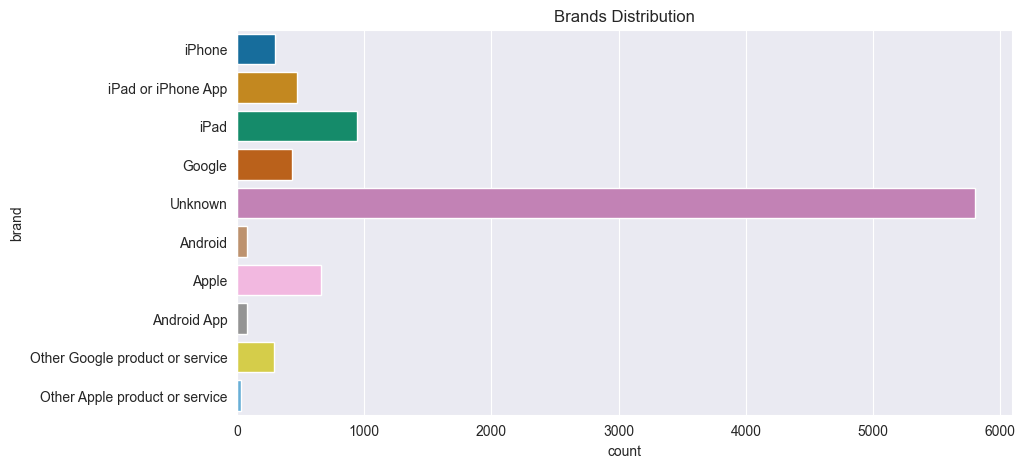

In [9]:
# Visualize the brand counts
# set grid style
sns.set_style(style='darkgrid')

# plot the loan status distribution count
plt.figure(figsize=(10,5))
sns.countplot(data=sent_df, 
              y='brand', 
              hue='brand', 
              palette="colorblind",
              legend=False)
plt.title('Brands Distribution')

In [10]:
# Review unique sentiment values
sent_df["sentiment"].value_counts(normalize=True)

sentiment
No emotion toward brand or product    0.592654
Positive emotion                      0.327505
Negative emotion                      0.062686
I can't tell                          0.017156
Name: proportion, dtype: float64

2.3.1 To explore the distribution of sentiment across different tech brands and products

In [11]:
# Create simplified sentiments Labels
sent_map = {"No emotion toward brand or product": "No emotion",
            "Positive emotion": "Positive",
            "Negative emotion": "Negative",
            "I can't tell": "Uncertain"}

# Applying mapping of labels to the sentiment column
sent_df['sentiment'] = sent_df["sentiment"].map(sent_map)
sent_df.head()

,tweet,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


In [12]:
# Review unique sentiment values
sent_df["sentiment"].value_counts(normalize=True)

sentiment
No emotion    0.592654
Positive      0.327505
Negative      0.062686
Uncertain     0.017156
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Sentiment Distribution')

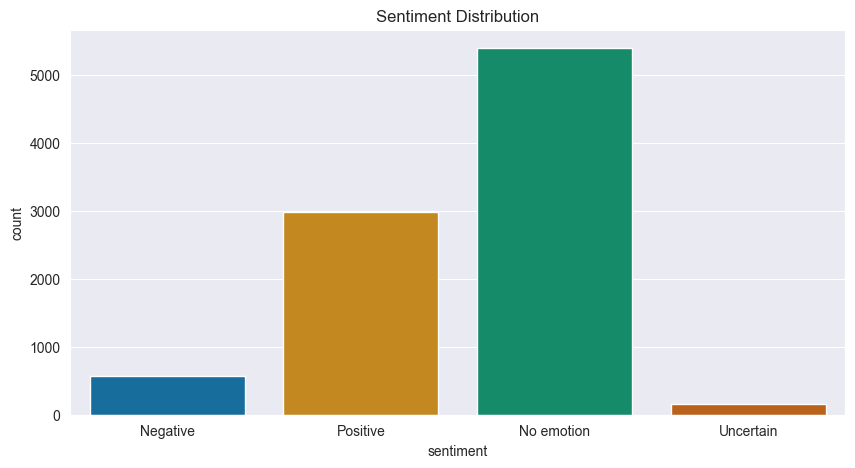

In [13]:
# Visualize the sentiments
# set grid style
sns.set_style(style='darkgrid')

# plot the loan status distribution count
plt.figure(figsize=(10,5))
sns.countplot(data=sent_df, 
              x='sentiment', 
              hue='sentiment', 
              palette="colorblind",
              legend=False)
plt.title('Sentiment Distribution')

We can infer that we have an data Imbalance

2.3.2 To analyze the relationship between brand category and sentiments

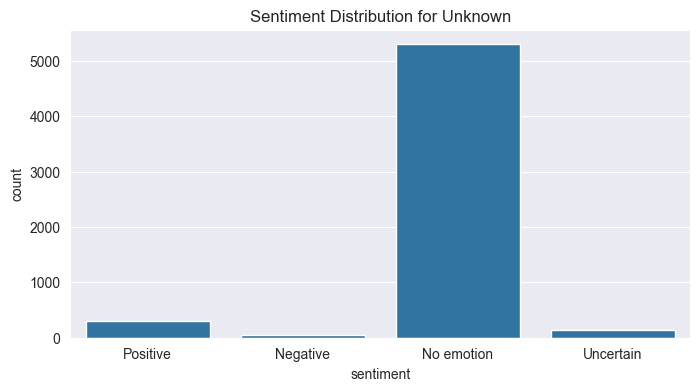

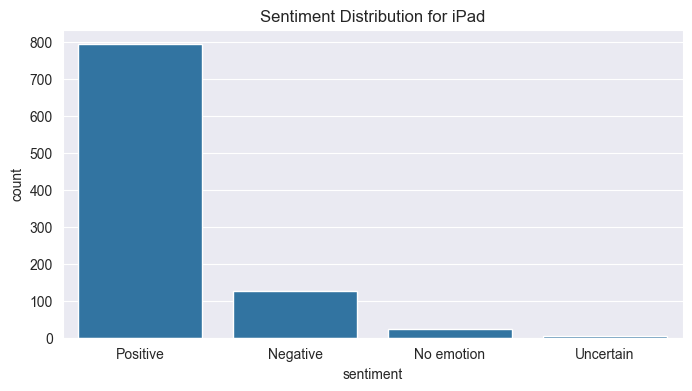

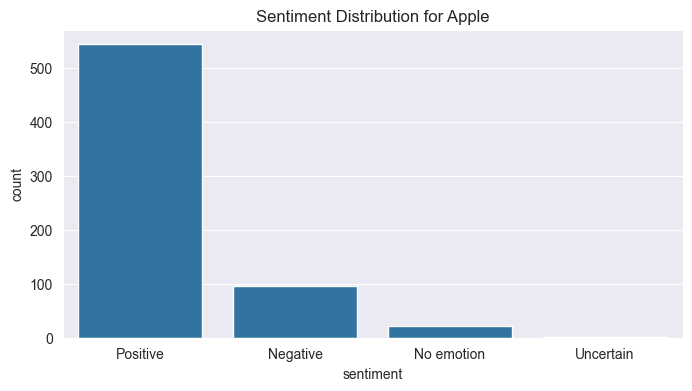

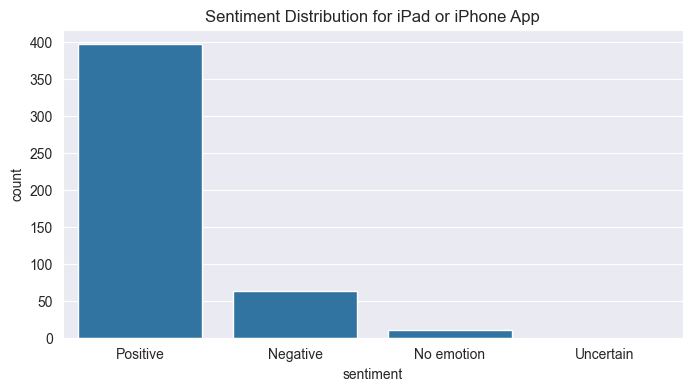

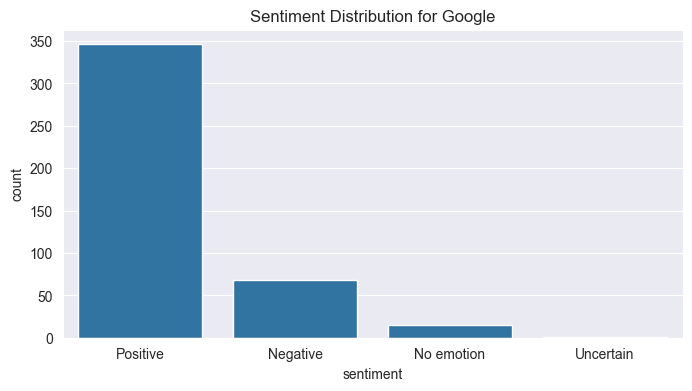

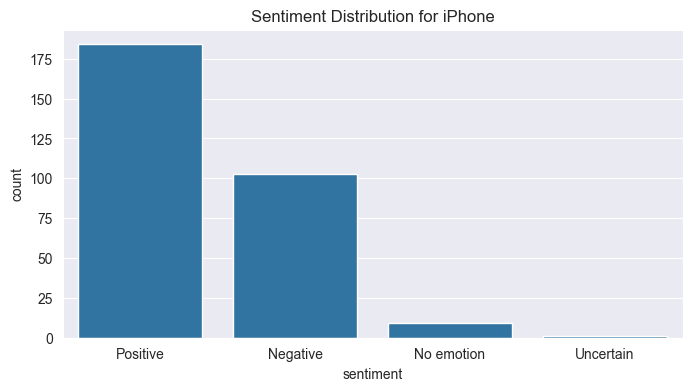

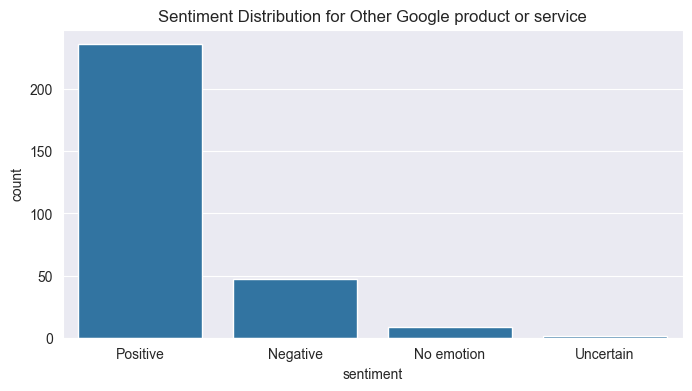

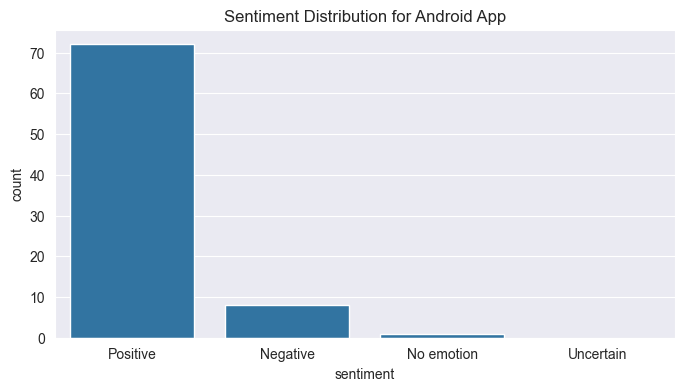

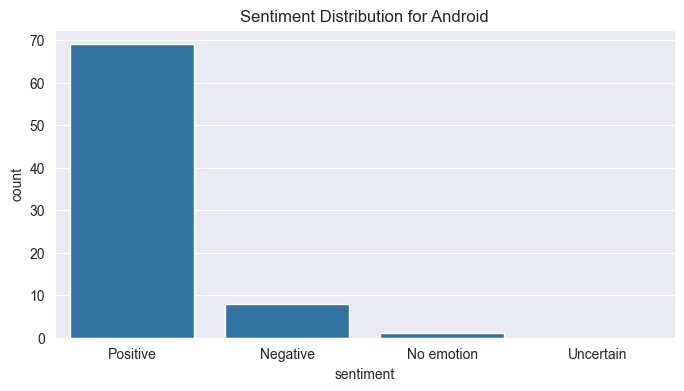

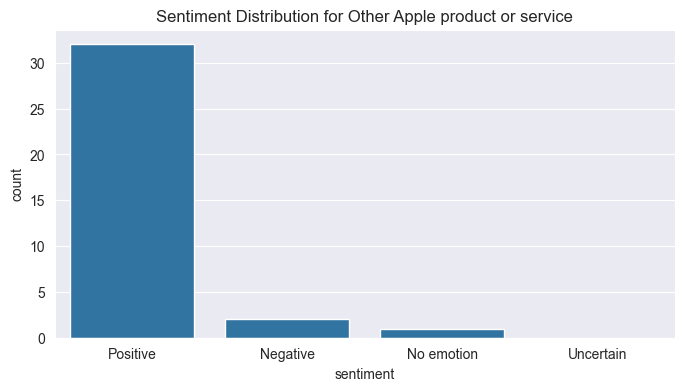

In [14]:
# Sentiment by brands
for b in brands.index:
    brand_data = sent_df[sent_df['brand'] == b]
    plt.figure(figsize=(8, 4))
    sns.countplot(data=brand_data, 
                  x='sentiment', 
                  order=['Positive', 'Negative', 'No emotion', "Uncertain"])
    plt.title(f'Sentiment Distribution for {b}')
    plt.show()

2.3.3 To identify which brands/products generate the most positive/negative sentiment

In [15]:
# Group by brand and sentiment, then count occurrences
sent_counts = sent_df.groupby(['brand', 'sentiment'])['sentiment'].agg('count').unstack().fillna(0)
# sent_counts

# Sort by most positive brands
most_positive = sent_counts['Positive'].sort_values(ascending=False)
# most_positive

print("--- Most Positive Brands ---")
print(most_positive.head())

--- Most Positive Brands ---
brand
iPad                  793.0
Apple                 543.0
iPad or iPhone App    397.0
Google                346.0
Unknown               306.0
Name: Positive, dtype: float64


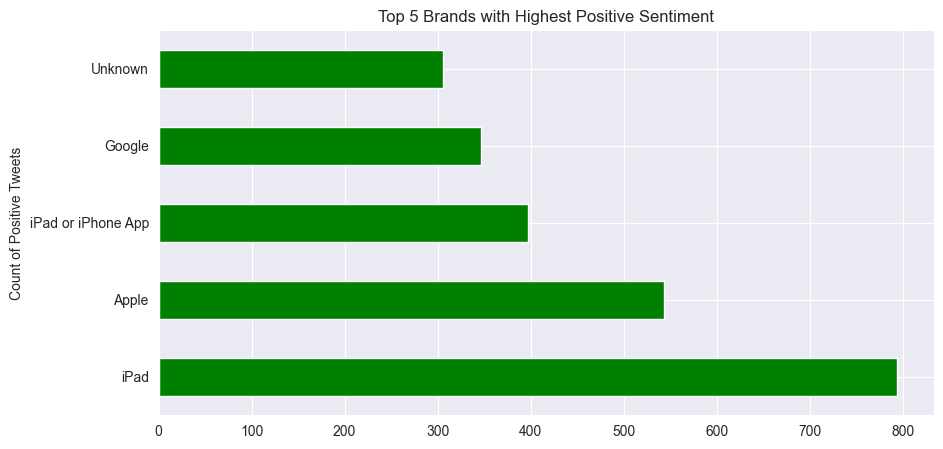

In [16]:
# Plot top 5 positive brands
plt.figure(figsize=(10, 5))
most_positive.head(5).plot(kind='barh', color='green')
plt.title('Top 5 Brands with Highest Positive Sentiment')
plt.ylabel('Count of Positive Tweets')
plt.show()

In [17]:
# Sort by most negative brands
most_negative = sent_counts['Negative'].sort_values(ascending=False)
# most_positive

print("--- Most Negative Brands ---")
print(most_negative.head())

--- Most Negative Brands ---
brand
iPad                  125.0
iPhone                103.0
Apple                  95.0
Google                 68.0
iPad or iPhone App     63.0
Name: Negative, dtype: float64


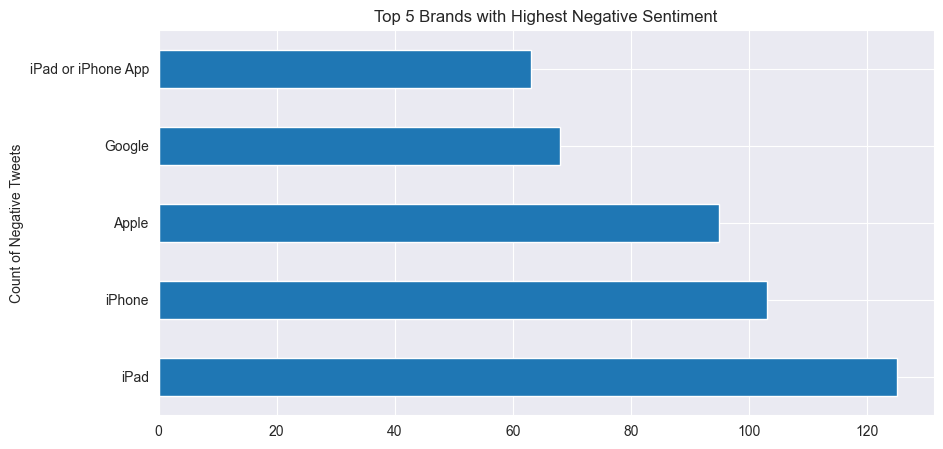

In [18]:
# Plot top 5 negative brands
plt.figure(figsize=(10, 5))
most_negative.head(5).plot(kind='barh')
plt.title('Top 5 Brands with Highest Negative Sentiment')
plt.ylabel('Count of Negative Tweets')
plt.show()

## 🧹 **3.0 Data Preparation**
---

### 🧼 **3.1 Data cleaning**

In [19]:
# Applying mapping of labels to the sentiment column
df['sentiment'] = df["sentiment"].map(sent_map)
df.head()

,tweet,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


In [20]:
# Check the percentage null values per feature
null = (df.isna().sum()/len(df))*100
null

tweet         0.010997
brand        63.807324
sentiment     0.000000
dtype: float64

In [21]:
# Drop brand column
df.drop(columns='brand', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   sentiment  9093 non-null   object
dtypes: object(2)
memory usage: 142.2+ KB


In [22]:
# Drop all null values
df.dropna(inplace=True)
df.isna().sum()

tweet        0
sentiment    0
dtype: int64

In [23]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Display info summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9070 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9070 non-null   object
 1   sentiment  9070 non-null   object
dtypes: object(2)
memory usage: 212.6+ KB


In [24]:
# Display value count of the target
df['sentiment'].value_counts()

sentiment
No emotion    5375
Positive      2970
Negative       569
Uncertain      156
Name: count, dtype: int64

In [25]:
# Remove the uncertain class it will create noise for our model
df = df[df["sentiment"]!="Uncertain"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8914 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      8914 non-null   object
 1   sentiment  8914 non-null   object
dtypes: object(2)
memory usage: 208.9+ KB


In [26]:
# Function to clean the data
def text_cleaning(text):
    
    # remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)

    #remove mentions
    text = re.sub(r'@\w+', '', text)

    # remove non-alphabetix characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Handle RT tags
    text = re.sub(r'[Rr][Tt]', '', text)

    # lowercasing 
    text = str.lower(text)

    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip() 

    return text

In [27]:
# Fuction to diplay frequency distribution of the mostly used words
def corpus_freq(text, top_n, language):
    # Create our list of stopwords
    stopwords_list = nltk.corpus.stopwords.words(language)

    # Creates bag of words for all the text in data
    bag_of_words = text.to_list()

    # Tokenize the words
    bag_of_words = [nltk.word_tokenize(i) for i in bag_of_words]

    # Create a list of all tokens with lower case
    bag_of_words = [word.lower() for list in bag_of_words for word in list]

    # Remove all stopwords
    bag_of_words = [word for word in bag_of_words if word not in stopwords_list]

    # Create frequency distribution
    word_freq = Counter(bag_of_words)
    word_df = pd.DataFrame(word_freq.items(), columns=['word', 'count'])
    word_df = word_df.sort_values(by='count', ascending=False).reset_index(drop=True)
    return word_df.head(top_n)
    

In [31]:
clean_df = df.copy()
clean_df['tweet'] = clean_df['tweet'].apply(text_cleaning)
top_ten_words = corpus_freq(clean_df['tweet'], 10, 'english')
top_ten_words

,word,count
0,sxsw,9480
1,link,4249
2,ipad,2958
3,google,2600
4,apple,2300
5,quot,1657
6,iphone,1558
7,store,1468
8,new,1075
9,austin,957


### 🛠️ **3.2 Preprocessing**

In [29]:
# Function to tokenize and lemmatize text
def tokenizer_lemmatizer(text):

    # Create tokens for the words
    tokens = nltk.word_tokenize(text)

    #instantiate lemmatizer
    lematizer = nltk.WordNetLemmatizer()

    # Create lemmas for the tokenized words
    lemmas = [lematizer.lemmatize(token) for token in tokens]

    return " ".join(lemmas)


In [30]:
# fuction to feature engineer no. of characters, words and sentences within a text
def feature_engineer(text):

    # Count of characters in a text
    chars_count = len(text)

    # Count of words in a text
    words_count= len(nltk.word_tokenize(text))

    # Count of sentences within a text
    sentence_count = len(nltk.sent_tokenize(text))

    return [chars_count, words_count, sentence_count]